In [1]:
import os
import sys 
sys.path.insert(0, '/home/aiwenxu/2022-xu-retinal-degeneration')

**Part 1: running retina simulation** 

In [3]:
import numpy as np
from model.retinasim_phase12.simulation import estim_to_retina_output
from model.retinasim_phase12.simulation_utils import SimulationParam
import pickle
from brian2 import *
import os
import pulse2percept as p2p

In [4]:
pre_computed_weights_folder = "../model/weights_phase12"
implant_mode = "epiretinal"
amp = 60

for light_g_max, cone_population in [(0.9, 100), (0.75, 80), (0.6, 60), (0.45, 40), (0.3, 20)]:

    sp_txt = "../model/parameter/cottaris_original_2hz.txt"
    sp = SimulationParam(sp_txt)

    sp.xy_coord_folder = "../model/layout_phase12/dendritic-tree-coordinate-{}".format(cone_population)
    sp.z_coord_folder = "../model/layout_phase12/z-coordinate-{}".format(cone_population)
    sp.imped = 1000
    
    # subretinal stimulation
    if implant_mode == "subretinal":
        sp.implant_mode = "subretinal"
        sp.electrode_z = 135

    pt = p2p.stimuli.BiphasicPulseTrain(20, amp, 0.45, stim_dur=1000, cathodic_first=True)

    time_in_ms = 1000
    select_GPU = 1
    genn_directory = "GeNNworkspace_{}".format(select_GPU)
    _, _, _, _, _, _, _, _, _, spikes_gl_on, spikes_gl_off = estim_to_retina_output(time_in_ms, sp, light_g_max, pt, pre_computed_weights_folder, delta_ve_folder="delta_ve_workspace_{}".format(select_GPU), dt=0.1, select_GPU=select_GPU, genn_directory=genn_directory)

    data_folder = "../data/fig9/data-phase12-{}-{}".format(light_g_max, cone_population)
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)

    with open('{}/spikes_gl_on.pickle'.format(data_folder), 'wb') as f:
        pickle.dump(spikes_gl_on, f)

    with open('{}/spikes_gl_off.pickle'.format(data_folder), 'wb') as f:
        pickle.dump(spikes_gl_off, f)

running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 152.99520587921143
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 141.37352752685547
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures

In [5]:
from model.retinasim_phase3.simulation import estim_to_retina_output
from model.retinasim_phase3.simulation_utils import SimulationParam

In [6]:
pre_computed_weights_folder = "../model/weights_phase3"
implant_mode = "epiretinal"
amp = 60

cell_percents = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
move_percents = [0, 10, 10, 20, 20, 30, 30, 40, 40, 50]

for i in range(10):
    
    cell_percent = cell_percents[i]
    move_percent = move_percents[i]
        
    sp_txt = "../model/parameter/cottaris_original_2hz.txt"
    sp = SimulationParam(sp_txt)

    sp.xy_coord_folder = "../model/layout_phase3/dendritic-tree-coordinate-{}".format(cell_percent)
    if move_percent == 0:
        sp.z_coord_folder = "../model/layout_phase3/z-coordinate-{}".format(cell_percent)
    else:
        sp.z_coord_folder = "../model/layout_phase3/z-coordinate-{}-move-{}".format(cell_percent, move_percent)
    sp.cone_exists = False
    sp.imped = 1000
    
    # implant mode
    if implant_mode == "subretinal":
        sp.implant_mode = "subretinal"
        sp.electrode_z = 135

    pt = p2p.stimuli.BiphasicPulseTrain(20, amp, 0.45, stim_dur=1000, cathodic_first=True)
    
    time_in_ms = 1000
    select_GPU = 1
    genn_directory = "GeNNworkspace_{}".format(select_GPU)
    _, _, _, _, _, _, _, _, _, spikes_gl_on, spikes_gl_off = estim_to_retina_output(time_in_ms, sp, pt, pre_computed_weights_folder, dt=0.1, delta_ve_folder="delta_ve_workspace_{}".format(select_GPU), select_GPU=select_GPU, genn_directory=genn_directory)

    data_folder = "../data/fig9/data-phase3-{}-{}".format(cell_percent, move_percent)
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)

    with open('{}/spikes_gl_on.pickle'.format(data_folder), 'wb') as f:
        pickle.dump(spikes_gl_on, f)

    with open('{}/spikes_gl_off.pickle'.format(data_folder), 'wb') as f:
        pickle.dump(spikes_gl_off, f)

running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 88.12873649597168
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 85.93071150779724
running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/

In [7]:
from model.retinasim_phase3.simulation_rgc_only import estim_to_retina_output
from model.retinasim_phase3.simulation_utils import SimulationParam

In [9]:
# running the special case where there are 0% inner neurons (only RGCs are left)

implant_mode = "epiretinal"
amp = 60
        
sp_txt = "../model/parameter/cottaris_original_2hz.txt"
sp = SimulationParam(sp_txt)

# This run simulates 0% cell (100% cell death), but here cell_percent=10 is used.
# This doesn't matter because the delta_ve values for the nonexistent cells will
# not be used.
cell_percent = 0
move_percent = 50
sp.xy_coord_folder = "../model/layout_phase3/dendritic-tree-coordinate-{}".format(10)
sp.z_coord_folder = "../model/layout_phase3/z-coordinate-{}-move-50".format(10, move_percent)
sp.cone_exists = False
sp.imped = 1000

# implant mode
if implant_mode == "subretinal":
    sp.implant_mode = "subretinal"
    sp.electrode_z = 135

pt = p2p.stimuli.BiphasicPulseTrain(20, amp, 0.45, stim_dur=1000, cathodic_first=True)

time_in_ms = 1000
select_GPU = 1
genn_directory = "GeNNworkspace_{}".format(select_GPU)
_, _, _, _, _, _, _, _, _, spikes_gl_on, spikes_gl_off = estim_to_retina_output(time_in_ms, sp, pt, dt=0.1, delta_ve_folder="delta_ve_workspace_{}".format(select_GPU), select_GPU=select_GPU, genn_directory=genn_directory)

data_folder = "../data/fig9/data-phase3-{}-{}".format(cell_percent, move_percent)
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

with open('{}/spikes_gl_on.pickle'.format(data_folder), 'wb') as f:
    pickle.dump(spikes_gl_on, f)

with open('{}/spikes_gl_off.pickle'.format(data_folder), 'wb') as f:
    pickle.dump(spikes_gl_off, f)

running brian code generation ...
building genn executable ...
['/home/aiwenxu/genn/bin/genn-buildmodel.sh', '-i', '/home/aiwenxu/2022-xu-retinal-degeneration/figures:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1:/home/aiwenxu/2022-xu-retinal-degeneration/figures/GeNNworkspace_1/brianlib/randomkit', 'magicnetwork_model.cpp']
executing genn binary on GPU ...
simulation time: 42.59277153015137


**Part 2: interpolation and plotting**

In [10]:
import matplotlib.pyplot as plt
from scipy import interpolate

In [11]:
def calculate_mean_std_center(spikes_gl, cell_type):
    num_spikes = []
    x, y = np.load("../model/layout_phase12/dendritic-tree-coordinate-100/GL_{}.npy".format(cell_type.upper()))
    for key in spikes_gl['t']:
        if np.sqrt(np.square(x[key]) + np.square(y[key])) <= 40:
            num_spikes.append(len(spikes_gl['t'][key]))
    spike_ar = np.array(num_spikes)
    return np.mean(num_spikes), np.std(num_spikes)

In [12]:
def line_plot_center(folder):
    on_fr_mean = []
    on_fr_std = []
    off_fr_mean = []
    off_fr_std = []
    for light_g_max, cone_population in [(0.9, 100), (0.75, 80), (0.6, 60), (0.45, 40), (0.3, 20)]:
        with open("{}/data-phase12-{}-{}/spikes_gl_on.pickle".format(folder, light_g_max, cone_population), 'rb') as f:
            on_spikes = pickle.load(f)
        on_m, on_s = calculate_mean_std_center(on_spikes, "on")
        on_fr_mean.append(on_m)
        on_fr_std.append(on_s)
        with open("{}/data-phase12-{}-{}/spikes_gl_off.pickle".format(folder, light_g_max, cone_population), 'rb') as f:
            off_spikes = pickle.load(f)
        off_m, off_s = calculate_mean_std_center(off_spikes, "off")
        off_fr_mean.append(off_m)
        off_fr_std.append(off_s)
    cell_percents = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
    move_percents = [0, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50]
    for i in range(11):
        cell_percent = cell_percents[i]
        move_percent = move_percents[i]
        with open("{}/data-phase3-{}-{}/spikes_gl_on.pickle".format(folder, cell_percent, move_percent), 'rb') as f:
            on_spikes = pickle.load(f)
        on_m, on_s = calculate_mean_std_center(on_spikes, "on")
        on_fr_mean.append(on_m)
        on_fr_std.append(on_s)
        with open("{}/data-phase3-{}-{}/spikes_gl_off.pickle".format(folder, cell_percent, move_percent), 'rb') as f:
            off_spikes = pickle.load(f)
        off_m, off_s = calculate_mean_std_center(off_spikes, "off")
        off_fr_mean.append(off_m)
        off_fr_std.append(off_s)
    fig, ax = plt.subplots(1,1,figsize=(18, 6))
    ax.errorbar(np.arange(16), on_fr_mean, yerr=on_fr_std, label="ON RGCs", linewidth=3)
    ax.errorbar(np.arange(16), off_fr_mean, yerr=off_fr_std, label="OFF RGCs", linewidth=3)
    ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
    ax.set_xticklabels(["healthy", "$g_\max$=0.75\ncone 80%", "$g_\max$=0.6\ncone 60%", "$g_\max$=0.45\ncone 40%", "$g_\max$=0.3\ncone 20%", "cone 0%", "death 10%\nmigration 10%", "death 20%\nmigration 10%", "death 30%\nmigration 20%", "death 40%\nmigration 20%", "death 50%\nmigration 30%", "death 60%\nmigration 30%", "death 70%\nmigration 40%", "death 80%\nmigration 40%", "death 90%\nmigration 50%", "death 100%\nmigration 50%"], fontsize=7)
    ax.set_ylabel("Firing Rate (Hz)")
    ax.legend()

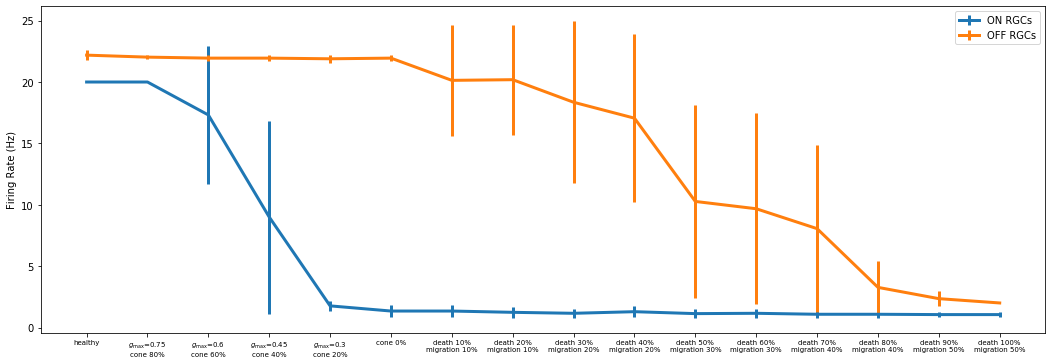

In [13]:
line_plot_center("../data/fig9")

In [14]:
def interp_wrapper(coord, data, method="rbf"):
    
    xi, yi = np.linspace(-150, 150, 100), np.linspace(-150, 150, 100)
    xi, yi = np.meshgrid(xi, yi)
    
    x_y_t = []
    
    if method == "cubic":
        coord = np.transpose(coord)
        for t in range(pol.shape[0]):
            zi = interpolate.griddata(coord, data[t], (xi, yi), method='cubic', fill_value=0)
            x_y_t.append(np.expand_dims(zi, axis=0))
            if t % 100 == 0:
                print(".", end="")
            
    elif method == "linear":
        coord = np.transpose(coord)
        for t in range(pol.shape[0]):
            zi = interpolate.griddata(coord, data[t], (xi, yi), method='linear', fill_value=0)
            x_y_t.append(np.expand_dims(zi, axis=0))
            if t % 100 == 0:
                print(".", end="")
            
    else:
        for t in range(data.shape[0]):
            rbf = interpolate.Rbf(coord[0], coord[1], data[t], function='linear')
            zi = rbf(xi, yi)
            x_y_t.append(np.expand_dims(zi, axis=0))
            if t % 100 == 0:
                print(".", end="")
        
    x_y_t_array = np.concatenate(x_y_t, axis=0)
    
    return x_y_t_array

In [15]:
def get_spike_rate(spikes_gl):
    spike_rates = []
    num_cells = len(spikes_gl['t'].keys())
    for i in range(num_cells):
        cur_rate = len(spikes_gl['t'][i])
        spike_rates.append(cur_rate)
    return np.expand_dims(np.array(spike_rates), axis=0)

In [19]:
def get_spike_rate_heatmap(spikes_gl, cell_type):
    sr = get_spike_rate(spikes_gl)
    coord_folder = "../model/layout_phase12/dendritic-tree-coordinate-100"
    coord = np.load(coord_folder+"/"+cell_type.upper()+".npy")
    res = interp_wrapper(coord, sr)
    return res[0]

In [20]:
def heatmaps(folder):
            
    labels = ["healthy", "$g_\max$=0.75\ncone 80%", "$g_\max$=0.6\ncone 60%", "$g_\max$=0.45\ncone 40%", "$g_\max$=0.3\ncone 20%", "cone 0%", "death 10%\nmigration 10%", "death 20%\nmigration 10%", "death 30%\nmigration 20%", "death 40%\nmigration 20%", "death 50%\nmigration 30%", "death 60%\nmigration 30%", "death 70%\nmigration 40%", "death 80%\nmigration 40%", "death 90%\nmigration 50%", "death 100%\nmigration 50%"]
    fig, axs = plt.subplots(2, 16, figsize=(30,4))
    for i, params in enumerate([(0.9, 100), (0.75, 80), (0.6, 60), (0.45, 40), (0.3, 20)]):
        light_g_max, cone_population = params
        with open("{}/data-phase12-{}-{}/spikes_gl_on.pickle".format(folder, light_g_max, cone_population), 'rb') as f:
            on_spikes = pickle.load(f)
        heatmap = get_spike_rate_heatmap(on_spikes, "gl_on")
        axs[0][i].imshow(heatmap, vmin=0, vmax=25, cmap="plasma")
        axs[0][i].set_xticks([])
        axs[0][i].set_yticks([])
        p = plt.Circle((50, 50), 40/3, color='black',fill=False)
        axs[0][i].add_patch(p)
        axs[0][i].set_title(labels[i], fontsize=9)
        with open("{}/data-phase12-{}-{}/spikes_gl_off.pickle".format(folder, light_g_max, cone_population), 'rb') as f:
            off_spikes = pickle.load(f)
        heatmap = get_spike_rate_heatmap(off_spikes, "gl_off")
        axs[1][i].imshow(heatmap, vmin=0, vmax=25, cmap="plasma")
        axs[1][i].set_xticks([])
        axs[1][i].set_yticks([])
        p = plt.Circle((50, 50), 40/3, color='black',fill=False)
        axs[1][i].add_patch(p)
        if i == 0:
            axs[0][i].set_ylabel("ON RGCs")
            axs[1][i].set_ylabel("OFF RGCs")
    cell_percents = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]
    move_percents = [0, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50]
    for i in range(11):
        cell_percent = cell_percents[i]
        move_percent = move_percents[i]
        with open("{}/data-phase3-{}-{}/spikes_gl_on.pickle".format(folder, cell_percent, move_percent), 'rb') as f:
            on_spikes = pickle.load(f)
        heatmap = get_spike_rate_heatmap(on_spikes, "gl_on")
        axs[0][i+5].imshow(heatmap, vmin=0, vmax=25, cmap="plasma")
        axs[0][i+5].set_xticks([])
        axs[0][i+5].set_yticks([])
        p = plt.Circle((50, 50), 40/3, color='black',fill=False)
        axs[0][i+5].add_patch(p)
        axs[0][i+5].set_title(labels[i+5], fontsize=9)
        with open("{}/data-phase3-{}-{}/spikes_gl_off.pickle".format(folder, cell_percent, move_percent), 'rb') as f:
            off_spikes = pickle.load(f)
        heatmap = get_spike_rate_heatmap(off_spikes, "gl_off")
        im = axs[1][i+5].imshow(heatmap, vmin=0, vmax=25, cmap="plasma")
        axs[1][i+5].set_xticks([])
        axs[1][i+5].set_yticks([])
        p = plt.Circle((50, 50), 40/3, color='black',fill=False)
        axs[1][i+5].add_patch(p)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar_ax.set_ylabel('Firing rate (Hz)', rotation=270, labelpad=18, fontsize=15)

................................

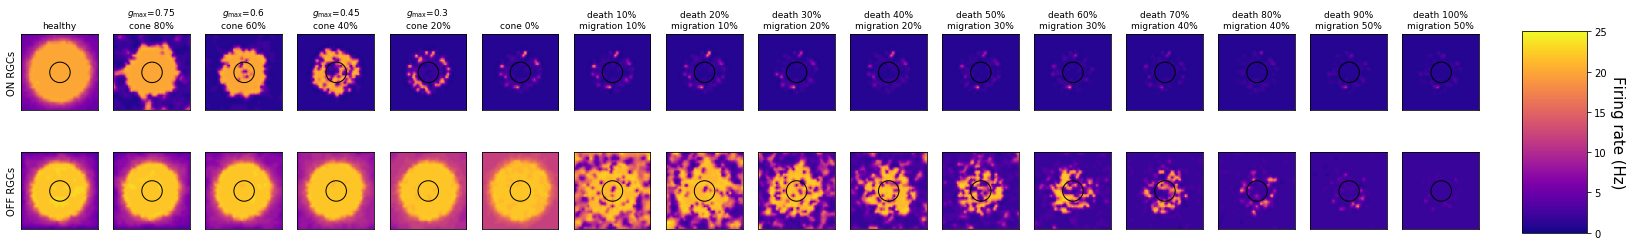

In [21]:
heatmaps("../data/fig9")